## What is the distribution of clear sky temperatures over 3000 m in winter and summer? 


This script downloads hourly ERA5 surface temperatures, in order to create a histogram for each month and year for temperatures above 3000 m. 


**Questions to answer**

- are the seasons similar to brightness temp distribution or is the signal of clouds clear in the tbb? 
- where is the overlap between coldest winter temps for clear sky and cloud tops at lower elevations? 
- what is the overlap between summer lowest (high elevations) and winter highest (low elevation)?

In [56]:
## This function downloads ERA5 files 

def download_era5_surfacetemp(year, month): 
    import cdsapi                                                                                           
    # Open a new Client instance                                                                            
    c = cdsapi.Client()         
    # output filename 
    file= 'surfacetemps/era5_'+'_'+ year + month+'.nc'
    # Send request (download data)                                                                     
    c.retrieve('reanalysis-era5-single-levels', {                                                           
            "product_type":   "reanalysis",                                                                 
            "format":         "netcdf",                                                                     
            "area":           "45.00/70.00/25.00/105.00",                                                   
            "variable":       '2t',                                                                                              
            "year":          [year],                                                      
            "month":         [ month],                
            "day":             ["01" , "02","03","04","05","06","07","08","09","10","11",                      
                           "12","13","14","15","16","17","18","19","20","21","22",                      
                           "23","24","25","26","27","28","29","30","31" ],                               
            "time": ['00:00','01:00','02:00',                                                                    
            '03:00','04:00','05:00',                                                                    
            '06:00','07:00','08:00',                                                                    
            '09:00','10:00','11:00',                                                                    
            '12:00','13:00','14:00',                                                                    
            '15:00','16:00','17:00',                                                                    
            '18:00','19:00','20:00',                                                                    
            '21:00','22:00','23:00'     
            ]
                                                                                                   
        }, file)                                                                

    print(file, 'downloaded and saved.')   
    return file


In [1]:
## import  elevation data 

import xarray as xr 
demfile = '/media/juli/Data/projects/master_thesis/Master_thesis/data/DEM_TP/dem_ERA5_format.nc'
dem= xr.open_dataarray(demfile)

In [105]:
dem.data[dem.data>= 3000].shape

(4574,)

In [3]:
# open file 
temps= xr.open_dataarray(demfile)
# extract elevations > 3000 m 
temps.data[:, dem.data < 3000] = 999

# save bin counts for file 
counts, bins = np.histogram(temps, bins = np.arange(190,320,5))

plt.imshow(dem)

IndexError: too many indices for array

In [65]:
# extract information from per month and year 
import numpy as np
import os 

years = np.arange(2000,2016).astype(str)
months = np.arange(1,13).astype(str)

# loop through month in year 
for year in ['2010']:
    for month in ['8']:
        print('start getting ERA5 surface temperatures for', year, month)

        # download file 
        file = download_era5_surfacetemp(year, month)
        # open file 
        temps= xr.open_dataarray(file)
        # extract elevations > 3000 m 
        temps.data[:, dem.data < 3000] = 999

        # save bin counts for file 
        counts, bins = np.histogram(temps.data, bins = np.arange(190,320,5))
        np.savetxt('surfacetemps/counts_'+ str(year)+ str(month)+'.txt')

        # remove file
        os.remove(file)
        print('info extracted from ', file)

2020-03-02 09:26:15,536 INFO Welcome to the CDS
2020-03-02 09:26:15,537 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


start getting ERA5 surface temperatures for 2010 8


2020-03-02 09:26:15,838 INFO Request is queued
2020-03-02 09:26:16,879 INFO Request is running
2020-03-02 09:27:31,103 INFO Request is completed
2020-03-02 09:27:31,105 INFO Downloading http://136.156.132.105/cache-compute-0000/cache/data0/adaptor.mars.internal-1583137576.0597289-27969-7-e5421e25-6c19-4f53-8ce5-ad93a406fe9c.nc to surfacetemps/era5__20108.nc (16.2M)
2020-03-02 09:27:35,795 INFO Download rate 3.5M/s   


surfacetemps/era5__20108.nc downloaded and saved.


NameError: name 'file' is not defined

## Look at distributions 

In [5]:
import glob 

spring_files =  glob.glob('surfacetemps/counts_????[3..5].txt')

autumn_files =  glob.glob('surfacetemps/counts_????1[0..1].txt')

summer_files =  glob.glob('surfacetemps/counts_????[6..8].txt')

winter_files = glob.glob('surfacetemps/counts_????[1..2].txt') 

for i in glob.glob('surfacetemps/counts_????12.txt'):
    winter_files.append(i)


for i in glob.glob('surfacetemps/counts_????9.txt'):
    autumn_files.append(i)    
    

In [6]:
import numpy as np 

summer= np.zeros((25,))

for f in summer_files:
    summer+= np.loadtxt(f)
    
    
    
winter= np.zeros((25,))

for f in winter_files:
    winter += np.loadtxt(f)
    
    
autumn= np.zeros((25,))

for f in autumn_files:
    autumn += np.loadtxt(f)
    
    
spring= np.zeros((25,))

for f in spring_files:
    spring += np.loadtxt(f)

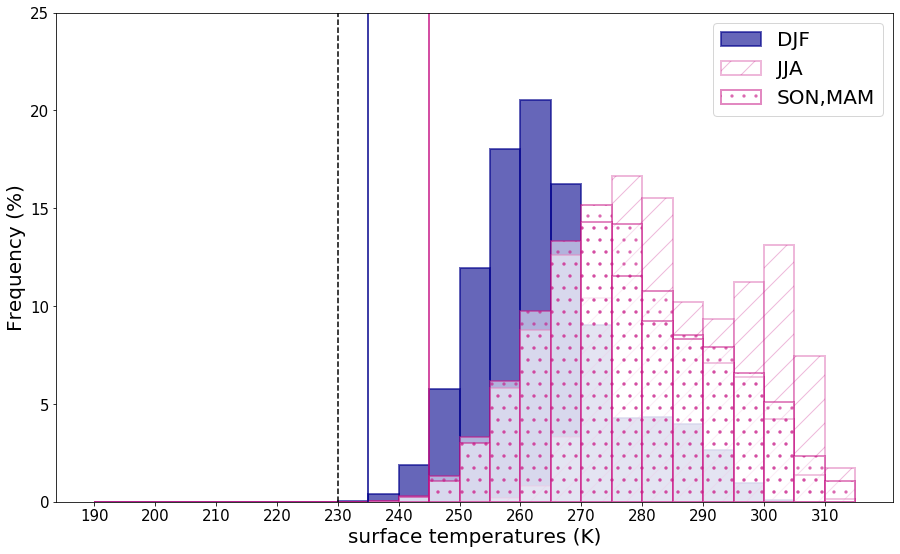

In [21]:
# plot of all surface temperatures > 3000 m 
import matplotlib.pyplot as plt 


bins = np.arange(190,320,5)
plt.figure(figsize = (15,9))


plt.bar(bins[:-1], winter/np.nansum(winter) * 100, width = 5, align= 'edge', edgecolor = 'darkblue', color = 'darkblue' , linewidth= 2.0, alpha= 0.6, label= 'DJF')
plt.bar(bins[:-1], summer/np.nansum(summer) * 100, width = 5, align= 'edge', edgecolor = 'mediumvioletred', color = 'white', alpha = 0.3,linewidth= 2.0, label= 'JJA', hatch='/')



#plt.bar(bins[:-1], wi/np.nansum(wi) * 100, width = 5, align= 'edge', edgecolor = 'teal', color = 'teal' , alpha = 0.4,linewidth= 2.0, label= 'tbb')
#plt.bar(bins[:-1], su/np.nansum(su) * 100, width = 5, align= 'edge', edgecolor = 'salmon', color = 'white', alpha= 0.4, linewidth= 2.0, label= 'tbb', hatch = '/')


plt.bar(bins[:-1], autumn/np.nansum(autumn) * 100, width = 5, align= 'edge', edgecolor = 'mediumvioletred', color = 'white', alpha = 0.5,linewidth= 2.0, hatch= '.')

plt.bar(bins[:-1], spring/np.nansum(spring) * 100, width = 5, align= 'edge', edgecolor = 'mediumvioletred', color = 'white', alpha = 0.5,linewidth= 2.0, label= 'SON,MAM', hatch= '.')

#plt.bar(bins[:-1], autumn/np.nansum(autumn) * 100, width = 5, align= 'edge', edgecolor = 'salmon', color = 'white', alpha = 0.2,linewidth= 2.0, hatch= '.')


plt.vlines(235,0,28, colors= 'darkblue')
plt.vlines(245,0,28, colors= 'mediumvioletred')
plt.vlines(230,0,28, colors= 'black', linestyle= '--')


plt.xticks(bins[::2], fontsize= 15)
plt.yticks(np.arange(0,30,5), fontsize= 15)
plt.legend(fontsize= 20)
plt.ylim(0,25)

plt.ylabel('Frequency (%)', fontsize = 20)
plt.xlabel('surface temperatures (K)', fontsize= 20)
plt.savefig('surface_temps_allseasons_above3000m.png')
plt.show()

